In [17]:
import jax.numpy as jnp
import jax
jax.config.update("jax_enable_x64", True)
import jaxdem as jd
import numpy as np
from config import default_config
from bump_utils import create, render

import os
data_root = '/home/mmccraw/dev/data/26-01-01/grant/specific-heat/'

jamming_root = os.path.join(data_root, 'jamming')
if not os.path.exists(jamming_root):
    os.makedirs(jamming_root)

for mu_eff in [0.01, 0.1, 1.0]:
    for aspect_ratio in [1.0, 1.5, 2.0]:


        particle_name = f'mu-{mu_eff}-alpha-{aspect_ratio}'
        particle_root = os.path.join(jamming_root, particle_name)
        states, systems = [], []
        for i in range(default_config.n_duplicates):
            state, system = create(default_config.phi, default_config.N, mu_eff, aspect_ratio, default_config.min_nv)
            states.append(state)
            systems.append(system)
            break
        break
    break

Generating Clumps: 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]


In [18]:
new_system = jd.System.create(
    state_shape=state.shape,
    dt=system.dt,
    linear_integrator_type="linearfire",
    rotation_integrator_type="rotationfire",
    domain_type="periodic",
    force_model_type="spring",
    # collider_type="neighborlist",
    # collider_kw=dict(
    #     state=state,
    #     cutoff=jnp.max(state.rad)
    # ),
    collider_type="celllist",
    collider_kw=dict(
        state=state
    ),
    # collider_type="naive",
    mat_table=system.mat_table,
    domain_kw=dict(
        box_size=system.domain.box_size,
    ),
)

In [19]:
new_state, new_new_system = new_system.collider.compute_force(state, new_system)


In [20]:
new_new_system.collider

DynamicCellList(neighbor_mask=Array([[-4, -4],
       [-4, -3],
       [-4, -2],
       [-4, -1],
       [-4,  0],
       [-4,  1],
       [-4,  2],
       [-4,  3],
       [-4,  4],
       [-3, -4],
       [-3, -3],
       [-3, -2],
       [-3, -1],
       [-3,  0],
       [-3,  1],
       [-3,  2],
       [-3,  3],
       [-3,  4],
       [-2, -4],
       [-2, -3],
       [-2, -2],
       [-2, -1],
       [-2,  0],
       [-2,  1],
       [-2,  2],
       [-2,  3],
       [-2,  4],
       [-1, -4],
       [-1, -3],
       [-1, -2],
       [-1, -1],
       [-1,  0],
       [-1,  1],
       [-1,  2],
       [-1,  3],
       [-1,  4],
       [ 0, -4],
       [ 0, -3],
       [ 0, -2],
       [ 0, -1],
       [ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 1, -4],
       [ 1, -3],
       [ 1, -2],
       [ 1, -1],
       [ 1,  0],
       [ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 2, -4],
       [ 2, -3],
       [ 2, -2],
 

In [21]:
new_state.rad

Array([0.44332424, 0.44332424, 0.44332424, ..., 0.44332424, 0.44332424,
       0.44332424], dtype=float64)

In [22]:
jnp.sum(new_state.force, axis=0)

Array([0., 0.], dtype=float64)

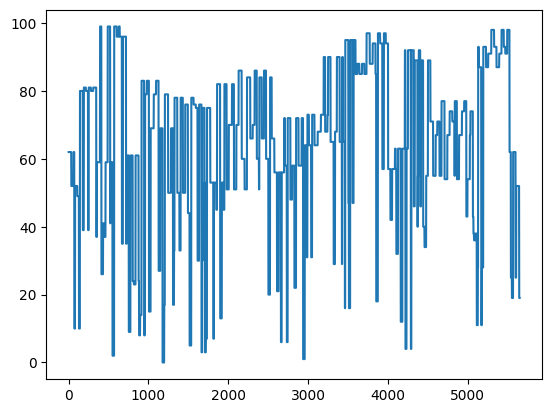

In [23]:
import matplotlib.pyplot as plt
plt.plot(new_state.ID)